# GEOG5990M Final Project Assignment

Student ID number:  201777629 

# Project Introduce

In [1]:
# this notebook run on the 'spatial_env' environment kernel
# load required packages
import pandas 
import seaborn 
import numpy 
import matplotlib.pyplot as mplpplt
import os
import zipfile

import pyproj
import contextily as ctx
import geopandas 
import geoplot as gplt
import geoplot.crs as gcrs

C:\Users\xcj_localforTianxuan\AppData\Local\Temp\ipykernel_50424\406176091.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


# Data Pre-Process/Cleaning

## load datas

### migrant indicator from 2021 census

In [2]:
## the migrant indicator data from 2021 Census Topic Summaries, TS019 - Migrant Indicator
# this file contains multipule rows with notes that are not part of data, if reading by default will result in a dataframe with structural errors
Migrant_Indicator_wrongread = pandas.read_csv('Datas/csnsus2021_TS019 - Migrant Indicator.csv',delimiter="\t")
Migrant_Indicator_wrongread
# obviously, pandas treated the title "TS019 - Migrant Indicator" as a column

,TS019 - Migrant Indicator
0,ONS Crown Copyright Reserved [from Nomis on 22...
1,"Population :,""All usual residents"""
2,"Units :,""Persons"""
3,"Date :,""2021"""
4,"2021 super output area - lower layer,""mnemonic..."
...,...
493,",""In order to protect against disclosure of pe..."
494,",""have been swapped between different geograph..."
495,",""by small amounts. Small counts at the lowest..."
496,",""affected."""


In [3]:
# skip the first 7 row to avoid that 
Migrant_Indicator_rightread = pandas.read_csv('Datas/csnsus2021_TS019 - Migrant Indicator.csv', skiprows=7)
Migrant_Indicator_rightread
# structure correctly read

,2021 super output area - lower layer,mnemonic,Total: All usual residents,Address one year ago is the same as the address of enumeration,Address one year ago is student term-time or boarding school address in the UK,Migrant from within the UK: Address one year ago was in the UK,Migrant from outside the UK: Address one year ago was outside the UK
0,Leeds 001A,E01011698,1448.0,1367.0,5.0,75.0,1.0
1,Leeds 001B,E01011699,1278.0,1184.0,3.0,87.0,4.0
2,Leeds 001C,E01011701,1356.0,1224.0,2.0,126.0,4.0
3,Leeds 001D,E01011702,1631.0,1390.0,9.0,203.0,29.0
4,Leeds 001E,E01011703,1219.0,1137.0,6.0,74.0,2.0
...,...,...,...,...,...,...,...
488,NaN,In order to protect against disclosure of pers...,NaN,NaN,NaN,NaN,NaN
489,NaN,have been swapped between different geographic...,NaN,NaN,NaN,NaN,NaN
490,NaN,by small amounts. Small counts at the lowest g...,NaN,NaN,NaN,NaN,NaN
491,NaN,affected.,NaN,NaN,NaN,NaN,NaN


### west yorkshire street crime from uk police

In [ ]:
## Crime data of 2021.4 to 2021.12 of West Yorkshire street
#the zip file has a very long file name made by source, which may cause problem with windows file explorer, so rename it
os.rename('Datas/c3b4b2b813b856dd673e42b11b7438cbdd90a5db.zip','Datas/crimeLeeds202104to12.zip')

In [4]:
#.csv file of each month is in 1 layer of folders in zip file, make a loop to read them, this step can be skiped by manually copy them out from individual folders
CrimeWestyorkshire2021_List = [None]*9 #create a list to store dataframes
CrimeWestyorkshire2021_zip = zipfile.ZipFile('Datas/crimeLeeds202104to12.zip')
#the folder structure is zipfile/2021-xx/2021-xx-west-yorkshire-street.csv 
for readnum in range(9):# due to the uk police data website's limitation, only 9 months' rather than 12 months' data are accessable 
    if readnum < 6 : pathInCrimeZip = "2021-0"+str(readnum+4)+"/2021-0"+str(readnum+4)+"-west-yorkshire-street.csv"
    else : pathInCrimeZip = "2021-"+str(readnum+4)+"/2021-"+str(readnum+4)+"-west-yorkshire-street.csv"
    CrimeWestyorkshire2021_List[readnum] = pandas.read_csv(CrimeWestyorkshire2021_zip.open(pathInCrimeZip))


### LSOA shape file in 2021 census version

In [5]:
## shape file of 2021 census version of Lower layer Super Output Areas of England&Wales
# ATTENTION! the file is not included in, the name here might be different with the download one
LSOA_EW_2021 = geopandas.read_file('Datas/Lower_layer_Super_Output_Areas_2021_EW_BFC_V8_8154990398368723939.zip')

## remove irrelevant parts & null

### the migrant indicator data
#### remove irrelevant information
this .csv file has some notes and record cells, which need to be removed 

In [6]:
## the migrant indicator data
# during the read process the notes at head of the form has been removed, check tail
Migrant_Indicator_rightread.tail()

,2021 super output area - lower layer,mnemonic,Total: All usual residents,Address one year ago is the same as the address of enumeration,Address one year ago is student term-time or boarding school address in the UK,Migrant from within the UK: Address one year ago was in the UK,Migrant from outside the UK: Address one year ago was outside the UK
488,NaN,In order to protect against disclosure of pers...,NaN,NaN,NaN,NaN,NaN
489,NaN,have been swapped between different geographic...,NaN,NaN,NaN,NaN,NaN
490,NaN,by small amounts. Small counts at the lowest g...,NaN,NaN,NaN,NaN,NaN
491,NaN,affected.,NaN,NaN,NaN,NaN,NaN
492,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# this datafram still contain some personal privacy related notes, so drop them
Migrant_Indicator_dataonly = Migrant_Indicator_rightread.drop([488,489,490,491])
Migrant_Indicator_dataonly.tail()

,2021 super output area - lower layer,mnemonic,Total: All usual residents,Address one year ago is the same as the address of enumeration,Address one year ago is student term-time or boarding school address in the UK,Migrant from within the UK: Address one year ago was in the UK,Migrant from outside the UK: Address one year ago was outside the UK
484,Leeds 112A,E01011467,1966.0,1608.0,16.0,308.0,34.0
485,Leeds 112B,E01011468,1996.0,1775.0,3.0,197.0,21.0
486,Leeds 112C,E01011470,1262.0,1162.0,5.0,91.0,4.0
487,Leeds 112F,E01035054,2553.0,1379.0,76.0,967.0,131.0
492,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### remove null
after remove notes, re move null rows

In [8]:
# looks like there is a null row, check the sum of null
Migrant_Indicator_dataonly.isna().sum()

2021 super output area - lower layer                                              1
mnemonic                                                                          1
Total: All usual residents                                                        1
Address one year ago is the same as the address of enumeration                    1
Address one year ago is student term-time or boarding school address in the UK    1
Migrant from within the UK: Address one year ago was in the UK                    1
Migrant from outside the UK: Address one year ago was outside the UK              1
dtype: int64

In [9]:
# only one row, which is obviously the row at the end
Migrant_Indicator_dataonly = Migrant_Indicator_dataonly.dropna()
Migrant_Indicator_dataonly.isna().sum()

2021 super output area - lower layer                                              0
mnemonic                                                                          0
Total: All usual residents                                                        0
Address one year ago is the same as the address of enumeration                    0
Address one year ago is student term-time or boarding school address in the UK    0
Migrant from within the UK: Address one year ago was in the UK                    0
Migrant from outside the UK: Address one year ago was outside the UK              0
dtype: int64

### west yorkshire street crime data
the street crime data contains the record of whole west yorkshire, but the study/research area is Leeds, so try to remove datas out of Leeds

In [10]:
# check the actually data in each conlums by show the first form (data of 2021/4) as an example
CrimeWestyorkshire2021_List[0]

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,d9e3417dad8742d480aea5d30b11ae788ed6b7aa267a29...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.905890,53.930295,On or near Brown Bank Lane,E01010646,Bradford 001A,Burglary,Investigation complete; no suspect identified,NaN
1,bc4e6efed170af421d98c39e2854e91bf3b933cfdcb4b2...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
2,5fd3d231aad8778fa624377045059a8dc4aa3779c3b9c7...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
3,7f2d605e3e74585a07e14aa0b04d9a78221e128fe9f98d...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.879359,53.946225,On or near The Acres,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
4,c525f6487edef046c82c0adb00492c9a8bc8de3ec29d71...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.887983,53.945918,On or near Burns Hill,E01010647,Bradford 001B,Drugs,Local resolution,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
26559,01c4ba97c4c9e4ddec7a778ec1bfda556cb6c530a0909c...,2021-04,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN
26560,62553e361b5f53b1701b15fd17e6508759b69f459b41f3...,2021-04,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Unable to prosecute suspect,NaN
26561,69bbd15b2c8a1b6a26bc1d6c54d31982a1676bd8903828...,2021-04,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Status update unavailable,NaN
26562,60a8617763b6e44f26d971c110a9f4c02450ab78c0e956...,2021-04,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Status update unavailable,NaN


in the migrant indicator, the '2021 super output area - lower layer' is lsoa name in 2021census, while 'mnemonic' is lsoa code. This form also have these two variables named as 'LSOA name' and 'LSOA code'

#### remove null

before starting filting, noticing taht some rows don't have information about location, latitude and longitude, and MOST IMPORTANT, LSOA code&name
the LSOA name is the key variable we used for scale the data to study area - Leeds, null data will prevent filting, so for this data, remove the null/nan/none first

In [11]:
# firstly, have a look of each month's data's null cell information
nullofcrimeWY = [None]*9
for index in range(9):
    nullofcrimeWY[index] = CrimeWestyorkshire2021_List[index].isna().sum()
    nullofcrimeWY[index]['total row'] = CrimeWestyorkshire2021_List[index].shape[0]# add another conlumn to have a total number to compare with
pandas.DataFrame(nullofcrimeWY)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,total row
0,4000,0,0,0,529,529,0,529,529,0,4000,26564,26564
1,3564,0,0,0,589,589,0,589,589,0,3564,27377,27377
2,4048,0,0,0,632,632,0,632,632,0,4048,28971,28971
3,4168,0,0,0,612,612,0,612,612,0,4168,29547,29547
4,3629,0,0,0,641,641,0,641,641,0,3629,28107,28107
5,2939,0,0,0,671,671,0,671,671,0,2939,27980,27980
6,3044,0,0,0,620,620,0,620,620,0,3044,29381,29381
7,2218,0,0,0,585,585,0,585,585,0,2218,28041,28041
8,1632,0,0,0,493,493,0,493,493,0,1632,25793,25793


In [12]:
# create a new variable for no none west yorkshire crime data list
CrimeWestyorkshire2021_List_N = [None]*9
# drop the rows don't have the most important lsoa code
for dropcrimeindex in range(9):
    currentForm  = CrimeWestyorkshire2021_List[dropcrimeindex]
    CrimeWestyorkshire2021_List_N[dropcrimeindex] = currentForm.loc[currentForm['LSOA name'].notna()]

for index in range(9):
    nullofcrimeWY[index] = CrimeWestyorkshire2021_List_N[index].isna().sum()
    nullofcrimeWY[index]['total row'] = CrimeWestyorkshire2021_List_N[index].shape[0]# add another conlumn to have a total number to compare with
pandas.DataFrame(nullofcrimeWY)
# by removing null data in 'LSOA name', the null data in 'Longitude ''Latitude''Location'and'LSOA code'are also removed
# This indicates that these removed cases have consistency in the absence of these variables, so we could skip the steps of removing Nan of them

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,total row
0,3958,0,0,0,0,0,0,0,0,0,3958,26035,26035
1,3517,0,0,0,0,0,0,0,0,0,3517,26788,26788
2,3997,0,0,0,0,0,0,0,0,0,3997,28339,28339
3,4121,0,0,0,0,0,0,0,0,0,4121,28935,28935
4,3600,0,0,0,0,0,0,0,0,0,3600,27466,27466
5,2906,0,0,0,0,0,0,0,0,0,2906,27309,27309
6,3015,0,0,0,0,0,0,0,0,0,3015,28761,28761
7,2201,0,0,0,0,0,0,0,0,0,2201,27456,27456
8,1624,0,0,0,0,0,0,0,0,0,1624,25300,25300


For rest three variables contains lots of Nan rows: (removing irrelevant partly starts here too)
1. From the previous example, the 'Crime ID' variable contains the data of 64 characters consisted by integers and lowercase letters. This IDs are ambiguous and can't comtribute to this project since it's not data. It's whole conlumn is useless, So drop this conlumn instead of the Nan rows of it.
2. 'Last outcome category' have 13 kinds of reslut tpye, might useful for later analysis. Drop the rows with null cell may cause unnecessary information lost, so keep it 
3. 'Context' has same values with the total number of rows of the forms, which means this conlumn is completely empty. So drop it all.


In [13]:
# drop whole conlumn of 'Crime ID' and 'Context'
for index in range(9):
    CrimeWestyorkshire2021_List_N[index].drop(columns=['Crime ID','Context'], inplace=True)
    

C:\Users\xcj_localforTianxuan\AppData\Local\Temp\ipykernel_50424\1168005241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CrimeWestyorkshire2021_List_N[index].drop(columns=['Crime ID','Context'], inplace=True)
C:\Users\xcj_localforTianxuan\AppData\Local\Temp\ipykernel_50424\1168005241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CrimeWestyorkshire2021_List_N[index].drop(columns=['Crime ID','Context'], inplace=True)
C:\Users\xcj_localforTianxuan\AppData\Local\Temp\ipykernel_50424\1168005241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

In [14]:
# check the null information again 
for index in range(9):
    nullofcrimeWY[index] = CrimeWestyorkshire2021_List_N[index].isna().sum()
    nullofcrimeWY[index]['total row'] = CrimeWestyorkshire2021_List_N[index].shape[0]# add another conlumn to have a total number to compare with
pandas.DataFrame(nullofcrimeWY)
# success, now the Nan are all removed

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,total row
0,0,0,0,0,0,0,0,0,0,3958,26035
1,0,0,0,0,0,0,0,0,0,3517,26788
2,0,0,0,0,0,0,0,0,0,3997,28339
3,0,0,0,0,0,0,0,0,0,4121,28935
4,0,0,0,0,0,0,0,0,0,3600,27466
5,0,0,0,0,0,0,0,0,0,2906,27309
6,0,0,0,0,0,0,0,0,0,3015,28761
7,0,0,0,0,0,0,0,0,0,2201,27456
8,0,0,0,0,0,0,0,0,0,1624,25300


#### remove irrelevant
1. From the previous example, the 'Reported by' and 'Falls within' variable are character string. Because when downloading, the 'Forces' choice on https://data.police.uk/data/ is 'West Yorkshire Police' , so in this data these 2 variables only have one value - 'West Yorkshire Police'. So these two variables are also useless, remove/drop them.
2. For 'Longitude','Latitude','Location', they contains location information, might be useful in future, so keep them.	
3. For 'Crime type', useful for classfication, keep it.
4. For 'Month', not sure if it will be used, keep it too.


In [15]:
# drop whole conlumn of 'Reported by' and 'Falls within'
for index in range(9):
    CrimeWestyorkshire2021_List_N[index].drop(columns=['Reported by','Falls within'], inplace=True)
CrimeWestyorkshire2021_List_N[0]

C:\Users\xcj_localforTianxuan\AppData\Local\Temp\ipykernel_50424\3006915996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CrimeWestyorkshire2021_List_N[index].drop(columns=['Reported by','Falls within'], inplace=True)
C:\Users\xcj_localforTianxuan\AppData\Local\Temp\ipykernel_50424\3006915996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CrimeWestyorkshire2021_List_N[index].drop(columns=['Reported by','Falls within'], inplace=True)
C:\Users\xcj_localforTianxuan\AppData\Local\Temp\ipykernel_50424\3006915996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category
0,2021-04,-1.905890,53.930295,On or near Brown Bank Lane,E01010646,Bradford 001A,Burglary,Investigation complete; no suspect identified
1,2021-04,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect
2,2021-04,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect
3,2021-04,-1.879359,53.946225,On or near The Acres,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect
4,2021-04,-1.887983,53.945918,On or near Burns Hill,E01010647,Bradford 001B,Drugs,Local resolution
...,...,...,...,...,...,...,...,...
26030,2021-04,-1.323984,53.591239,On or near Grove Street,E01011872,Wakefield 045D,Vehicle crime,Status update unavailable
26031,2021-04,-1.331689,53.591255,On or near Holmsley Grove,E01011872,Wakefield 045D,Violence and sexual offences,Unable to prosecute suspect
26032,2021-04,-1.331445,53.590462,On or near Marion Close,E01011872,Wakefield 045D,Violence and sexual offences,Investigation complete; no suspect identified
26033,2021-04,-1.324140,53.589981,On or near Grove Mount,E01011872,Wakefield 045D,Violence and sexual offences,Unable to prosecute suspect


Start scaling data range

In [16]:
# this form also have lsoa name, use this by 'Leeds' to filte it
# create a new variable to store scaled data 
CrimeLeeds2021_List = [None]*9
for currentFormindex in range(9):
    currentForm = CrimeWestyorkshire2021_List_N[currentFormindex]
    CrimeLeeds2021_List[currentFormindex] = currentForm.loc[currentForm['LSOA name'].str.contains('Leeds')]

In [17]:
# have a look at new leeds street crime data
CrimeLeeds2021_List[0].info()
# well scaled

<class 'pandas.core.frame.DataFrame'>
Index: 9043 entries, 13169 to 22211
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  9043 non-null   object 
 1   Longitude              9043 non-null   float64
 2   Latitude               9043 non-null   float64
 3   Location               9043 non-null   object 
 4   LSOA code              9043 non-null   object 
 5   LSOA name              9043 non-null   object 
 6   Crime type             9043 non-null   object 
 7   Last outcome category  7697 non-null   object 
dtypes: float64(2), object(6)
memory usage: 635.8+ KB


In [18]:
# also have a look on new dataframe's nullcell information and each month's total street crime number
nullofcrimeLe = [None]*9
for index in range(9):
    nullofcrimeLe[index] = CrimeLeeds2021_List[index].isna().sum()
    nullofcrimeLe[index]['total row'] = CrimeLeeds2021_List[index].shape[0]# add another conlumn to have a total number to compare with
pandas.DataFrame(nullofcrimeLe)

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,total row
0,0,0,0,0,0,0,0,1346,9043
1,0,0,0,0,0,0,0,1208,9539
2,0,0,0,0,0,0,0,1350,10007
3,0,0,0,0,0,0,0,1445,10355
4,0,0,0,0,0,0,0,1329,10173
5,0,0,0,0,0,0,0,1051,9958
6,0,0,0,0,0,0,0,1201,10724
7,0,0,0,0,0,0,0,904,10144
8,0,0,0,0,0,0,0,601,9224


### LSOA shape file
#### remove irrelevant
the originial file contains the LSOAs of ENgland and wales, since the study/analysis area is Leeds, remove unnecessary areas to scale it

In [19]:
# have a look of what kindof  data each conlumns actually contains
LSOA_EW_2021

,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E01000001,City of London 001A,532123,181632,-0.097140,51.5182,ba0bf04c-03e6-4748-acf5-9dd1219c1860,"POLYGON ((532151.537 181867.433, 532152.500 18..."
1,E01000002,City of London 001B,532480,181715,-0.091970,51.5188,f4b205a5-5f68-4161-a014-5a2f51681597,"POLYGON ((532634.497 181926.016, 532632.048 18..."
2,E01000003,City of London 001C,532239,182033,-0.095320,51.5217,76c0a1fd-e446-4c40-9d5d-c98d689f23d5,"POLYGON ((532153.703 182165.155, 532158.250 18..."
3,E01000005,City of London 001E,533581,181283,-0.076270,51.5147,13d65a8b-5e13-443a-b355-5775794de964,"POLYGON ((533619.062 181402.364, 533639.868 18..."
4,E01000006,Barking and Dagenham 016A,544994,184274,0.089317,51.5387,06953962-0ae1-417a-8357-b314a1fb5716,"POLYGON ((545126.852 184310.838, 545145.213 18..."
...,...,...,...,...,...,...,...,...
35667,W01002036,Vale of Glamorgan 005G,317939,172435,-3.182170,51.4449,f1813c4c-3ba5-410d-8d38-3b3f07f8be6e,"POLYGON ((317808.500 172697.500, 317828.403 17..."
35668,W01002037,Vale of Glamorgan 005H,318527,172406,-3.173710,51.4448,05ee0cfe-ebd3-41ee-990e-bc789acf97d7,"POLYGON ((319033.579 172604.209, 319009.058 17..."
35669,W01002038,Vale of Glamorgan 014G,306491,167360,-3.345520,51.3975,145d894e-1553-44c7-91f0-c2f3e70ac846,"POLYGON ((306372.000 168726.000, 306363.000 16..."
35670,W01002039,Vale of Glamorgan 014H,306564,166023,-3.344110,51.3855,ca1b5894-4c3c-49fc-8dbf-ab0aa45d7d3b,"POLYGON ((306830.979 166442.608, 306834.000 16..."


In [20]:
# use LSOA21NM to filter the lsoas needed
# create a new variable with new name to distinguish it from the original variable
LSOA_leeds_2021 = LSOA_EW_2021.loc[LSOA_EW_2021['LSOA21NM'].str.contains('Leeds')]

In [21]:
LSOA_leeds_2021.info()
# the row number is 488, equals to 'Migrant_Indicator_dataonly', means it was well scaled

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 488 entries, 10719 to 33048
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   LSOA21CD  488 non-null    object  
 1   LSOA21NM  488 non-null    object  
 2   BNG_E     488 non-null    int64   
 3   BNG_N     488 non-null    int64   
 4   LONG      488 non-null    float64 
 5   LAT       488 non-null    float64 
 6   GlobalID  488 non-null    object  
 7   geometry  488 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(3)
memory usage: 34.3+ KB


This shape file has 488 total rows with 488 non-null rows, means this data has no none. No need to clean null. 

## Data frame structure adjust 
### make crime data  to 1 table
The street crime data of Leeds is still stored as a list of dataframe which mapped to months from April to December.
This is not convenient for later analysis, so merge it to one dataframe. The 'Month' variable kept by last part also works for this part for better identification.

In [22]:
# use pandas.concat() to do this
CrimeLeeds2021 = pandas.concat(CrimeLeeds2021_List)

In [23]:
#have a look on the merged dataframe
CrimeLeeds2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89167 entries, 13169 to 21476
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Month                  89167 non-null  object 
 1   Longitude              89167 non-null  float64
 2   Latitude               89167 non-null  float64
 3   Location               89167 non-null  object 
 4   LSOA code              89167 non-null  object 
 5   LSOA name              89167 non-null  object 
 6   Crime type             89167 non-null  object 
 7   Last outcome category  78732 non-null  object 
dtypes: float64(2), object(6)
memory usage: 6.1+ MB


# Analysising Process 

## Anslysis Migrant Indicator
in the dataframe there is still the original numbers, calculate them as percentage  for unification, and better for later analysising

In [100]:
# create a dataframe of migrate indicator with simplified variable names , make it easier to read and operate
Migrant_number = Migrant_Indicator_dataonly.copy()
# inplace = true to write change into dataframe
Migrant_number.rename(columns={'2021 super output area - lower layer':'LSOA_name' , 'mnemonic':'LSOA_code' , 'Total: All usual residents':'residents_population' , 'Address one year ago is the same as the address of enumeration':'Address1Yago_same' , 'Address one year ago is student term-time or boarding school address in the UK':'Address1Yago_schoolInUK' , 'Migrant from within the UK: Address one year ago was in the UK':'Address1Yago_migrantInUK' , 'Migrant from outside the UK: Address one year ago was outside the UK':'Address1Yago_migrantOutUK'},inplace = True)
Migrant_number

,LSOA_name,LSOA_code,residents_population,Address1Yago_same,Address1Yago_schoolInUK,Address1Yago_migrantInUK,Address1Yago_migrantOutUK
0,Leeds 001A,E01011698,1448.0,1367.0,5.0,75.0,1.0
1,Leeds 001B,E01011699,1278.0,1184.0,3.0,87.0,4.0
2,Leeds 001C,E01011701,1356.0,1224.0,2.0,126.0,4.0
3,Leeds 001D,E01011702,1631.0,1390.0,9.0,203.0,29.0
4,Leeds 001E,E01011703,1219.0,1137.0,6.0,74.0,2.0
...,...,...,...,...,...,...,...
483,Leeds 111E,E01033016,1041.0,614.0,24.0,340.0,63.0
484,Leeds 112A,E01011467,1966.0,1608.0,16.0,308.0,34.0
485,Leeds 112B,E01011468,1996.0,1775.0,3.0,197.0,21.0
486,Leeds 112C,E01011470,1262.0,1162.0,5.0,91.0,4.0


array([[<Axes: title={'center': 'residents_population'}>,
        <Axes: title={'center': 'Address1Yago_same'}>],
       [<Axes: title={'center': 'Address1Yago_schoolInUK'}>,
        <Axes: title={'center': 'Address1Yago_migrantInUK'}>],
       [<Axes: title={'center': 'Address1Yago_migrantOutUK'}>, <Axes: >]],
      dtype=object)

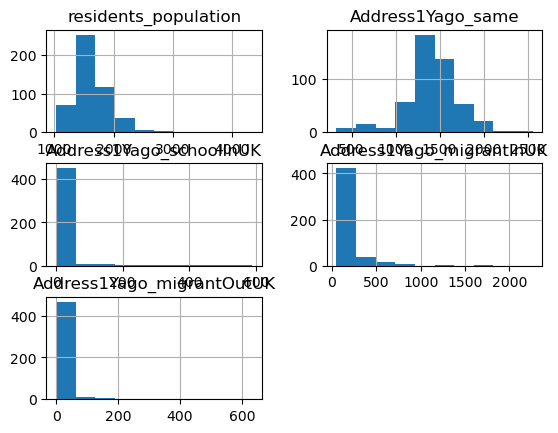

In [97]:
#simple explore
Migrant_number.hist()
# looks like the destribution of migrant situcation is relatively extreme, nearly all of areas only have small number of 'real' migrants, while others having a lot

In [102]:
Migrant_percentage  = pandas.DataFrame()
Migrant_percentage['LSOA_code'] = Migrant_number['LSOA_code']
for column in Migrant_number.columns:
    if column not in ['LSOA_code','LSOA_name','residents_population']:#avoid causing str/float error, also meanless 100%
        Migrant_percentage[column] = Migrant_number[column]/Migrant_number['residents_population'] * 100
        Migrant_percentage.rename(columns={column:column+'_P'},inplace=True)

Migrant_percentage

,LSOA_code,Address1Yago_same_P,Address1Yago_schoolInUK_P,Address1Yago_migrantInUK_P,Address1Yago_migrantOutUK_P
0,E01011698,94.406077,0.345304,5.179558,0.069061
1,E01011699,92.644757,0.234742,6.807512,0.312989
2,E01011701,90.265487,0.147493,9.292035,0.294985
3,E01011702,85.223789,0.551809,12.446352,1.778050
4,E01011703,93.273175,0.492207,6.070550,0.164069
...,...,...,...,...,...
483,E01033016,58.981748,2.305476,32.660903,6.051873
484,E01011467,81.790437,0.813835,15.666328,1.729400
485,E01011468,88.927856,0.150301,9.869739,1.052104
486,E01011470,92.076070,0.396197,7.210777,0.316957


array([[<Axes: title={'center': 'Address1Yago_same_P'}>,
        <Axes: title={'center': 'Address1Yago_schoolInUK_P'}>],
       [<Axes: title={'center': 'Address1Yago_migrantInUK_P'}>,
        <Axes: title={'center': 'Address1Yago_migrantOutUK_P'}>]],
      dtype=object)

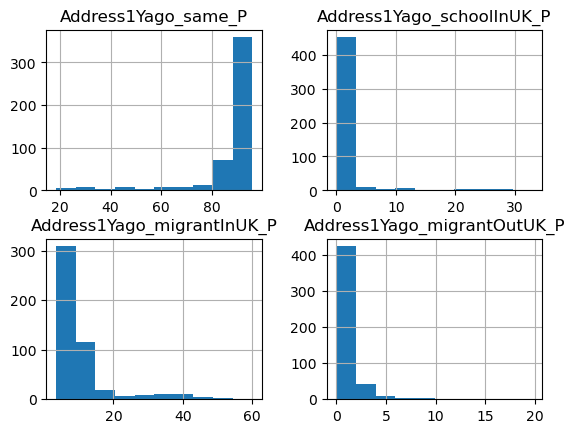

In [103]:
#simple explore
Migrant_percentage.hist()
# the ratio shows a more extreme destribution than simple number, since the relatively evenly distributed 'Address1Yago_same' also become extreme

In the original data, the note at the bottom says "In order to protect against disclosure of personal information, records have been swapped between different geographic areas and counts perturbed by small amounts. Small counts at the lowest geographies will be most affected."  
But for the integrity of data with 488 LSOAs to merge with shape file, ignore this man-made interference.

##  Extract street crime statistics for each LSOA in 2021
Due to the enormous data complexity brought about by cross computing, this research will not analysis crime data in multiple aggregation. It will make the dataframe's structure be like lsoa_code-multiple crime types-each crime type has own rows of results. Here with 14 types of crimes and 13 kinds of results, the dataframe will be extremely complex and unfriendly for analysis.

### crime type
count how many times of each type of crime in each LSOA, there are 14 types of crime in this data

In [138]:
# the existence of other columns like month, location and name will interfere the classfication, so create a new dataframe without them
CrimeLeeds2021_CrimetypeOnly = CrimeLeeds2021.loc[:,['LSOA code','Crime type']]
# create the new dataframe for storing the counting result of each type of crime in each lsoa
LSOACrime_L_type = CrimeLeeds2021_CrimetypeOnly.pivot_table(index='LSOA code', columns='Crime type',aggfunc='size' , fill_value=0)
# add a sum of all crime types as the total number of street crime
LSOACrime_L_type['Total crime'] = LSOACrime_L_type.sum(axis=1)
LSOACrime_L_type

Crime type,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Total crime
LSOA code,,,,,,,,,,,,,,,
E01011264,3,0,5,2,1,3,2,0,6,0,0,0,1,35,58
E01011265,22,2,12,15,7,5,13,1,23,2,31,4,5,65,207
E01011266,8,1,7,10,1,2,8,0,3,0,1,0,4,24,69
E01011267,12,0,8,16,0,0,4,1,13,0,0,1,3,93,151
E01011268,14,0,9,16,1,2,8,1,34,0,4,0,3,49,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E01035046,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
E01035047,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
E01035050,0,0,0,0,1,0,1,0,1,0,0,0,0,2,5


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Anti-social behaviour'),
  Text(1, 0, 'Bicycle theft'),
  Text(2, 0, 'Burglary'),
  Text(3, 0, 'Criminal damage and arson'),
  Text(4, 0, 'Drugs'),
  Text(5, 0, 'Other crime'),
  Text(6, 0, 'Other theft'),
  Text(7, 0, 'Possession of weapons'),
  Text(8, 0, 'Public order'),
  Text(9, 0, 'Robbery'),
  Text(10, 0, 'Shoplifting'),
  Text(11, 0, 'Theft from the person'),
  Text(12, 0, 'Vehicle crime'),
  Text(13, 0, 'Violence and sexual offences')])

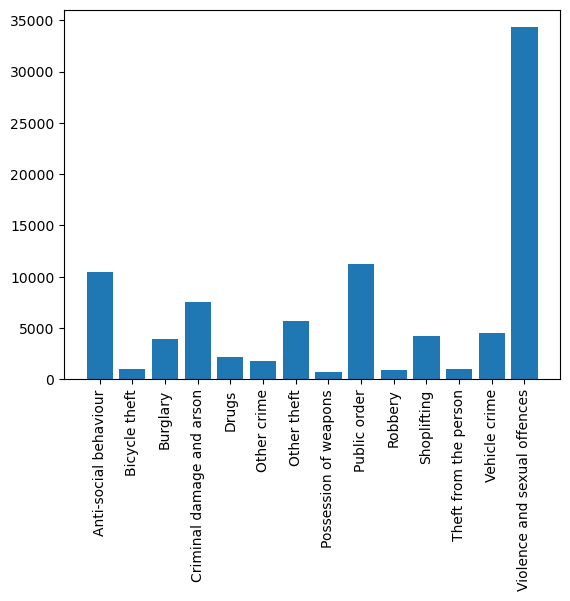

In [139]:
#simple explore
crimeType_temp = LSOACrime_L_type.drop(columns='Total crime').sum()
mplpplt.bar(crimeType_temp.index, crimeType_temp.values)
mplpplt.xticks(rotation=90)

Apart from several prominent crimes, there is no other obvious information

noticing that from the information, LSOACrime_L_type has 490 rahter than 488 lsoas like the shape file or census data, might because there are some lsoas' name contains 'Leeds' but not belongs to Leeds in census standard. This can be fixed later when join the dataframes and Shape files.

In [140]:
# check the minma of crime number
LSOACrime_L_type['Total crime'].min()
# it's not 0, so the percentage is computable

1

In [141]:
LSOACrime_L_type.columns

Index(['Anti-social behaviour', 'Bicycle theft', 'Burglary',
       'Criminal damage and arson', 'Drugs', 'Other crime', 'Other theft',
       'Possession of weapons', 'Public order', 'Robbery', 'Shoplifting',
       'Theft from the person', 'Vehicle crime',
       'Violence and sexual offences', 'Total crime'],
      dtype='object', name='Crime type')

from the output, the 'LSOA code' is not one of the columns but individual index column. This will struggle later process,so reset the index to make it normalized

In [142]:

LSOACrime_L_type_num = LSOACrime_L_type.reset_index()
LSOACrime_L_type_num

Crime type,LSOA code,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Total crime
0,E01011264,3,0,5,2,1,3,2,0,6,0,0,0,1,35,58
1,E01011265,22,2,12,15,7,5,13,1,23,2,31,4,5,65,207
2,E01011266,8,1,7,10,1,2,8,0,3,0,1,0,4,24,69
3,E01011267,12,0,8,16,0,0,4,1,13,0,0,1,3,93,151
4,E01011268,14,0,9,16,1,2,8,1,34,0,4,0,3,49,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,E01035046,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
486,E01035047,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
487,E01035050,0,0,0,0,1,0,1,0,1,0,0,0,0,2,5
488,E01035053,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [143]:
# create a new dataframe to store the ratio of types of crimes to total number
LSOACrime_L_type_Percentage = LSOACrime_L_type_num[['LSOA code','Total crime']].copy()
for column in LSOACrime_L_type_num.columns:
    if column not in ['LSOA code','Total crime']:# avoid causing str/int64 error, and meanlingless 100%  
        LSOACrime_L_type_Percentage[column] = LSOACrime_L_type_num[column]/LSOACrime_L_type_num['Total crime'] * 100
        LSOACrime_L_type_Percentage.rename(columns = {column:column+'_P'},inplace = True)

In [144]:
LSOACrime_L_type_Percentage
#some area with only 1 or 2 crime case will have very extreme percentage value, so this dataframe might not be used

Crime type,LSOA code,Total crime,Anti-social behaviour_P,Bicycle theft_P,Burglary_P,Criminal damage and arson_P,Drugs_P,Other crime_P,Other theft_P,Possession of weapons_P,Public order_P,Robbery_P,Shoplifting_P,Theft from the person_P,Vehicle crime_P,Violence and sexual offences_P
0,E01011264,58,5.172414,0.000000,8.620690,3.448276,1.724138,5.172414,3.448276,0.000000,10.344828,0.000000,0.000000,0.000000,1.724138,60.344828
1,E01011265,207,10.628019,0.966184,5.797101,7.246377,3.381643,2.415459,6.280193,0.483092,11.111111,0.966184,14.975845,1.932367,2.415459,31.400966
2,E01011266,69,11.594203,1.449275,10.144928,14.492754,1.449275,2.898551,11.594203,0.000000,4.347826,0.000000,1.449275,0.000000,5.797101,34.782609
3,E01011267,151,7.947020,0.000000,5.298013,10.596026,0.000000,0.000000,2.649007,0.662252,8.609272,0.000000,0.000000,0.662252,1.986755,61.589404
4,E01011268,141,9.929078,0.000000,6.382979,11.347518,0.709220,1.418440,5.673759,0.709220,24.113475,0.000000,2.836879,0.000000,2.127660,34.751773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,E01035046,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
486,E01035047,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
487,E01035050,5,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,20.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,40.000000
488,E01035053,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000


array([[<Axes: title={'center': 'Total crime'}>,
        <Axes: title={'center': 'Anti-social behaviour_P'}>,
        <Axes: title={'center': 'Bicycle theft_P'}>,
        <Axes: title={'center': 'Burglary_P'}>],
       [<Axes: title={'center': 'Criminal damage and arson_P'}>,
        <Axes: title={'center': 'Drugs_P'}>,
        <Axes: title={'center': 'Other crime_P'}>,
        <Axes: title={'center': 'Other theft_P'}>],
       [<Axes: title={'center': 'Possession of weapons_P'}>,
        <Axes: title={'center': 'Public order_P'}>,
        <Axes: title={'center': 'Robbery_P'}>,
        <Axes: title={'center': 'Shoplifting_P'}>],
       [<Axes: title={'center': 'Theft from the person_P'}>,
        <Axes: title={'center': 'Vehicle crime_P'}>,
        <Axes: title={'center': 'Violence and sexual offences_P'}>,
        <Axes: >]], dtype=object)

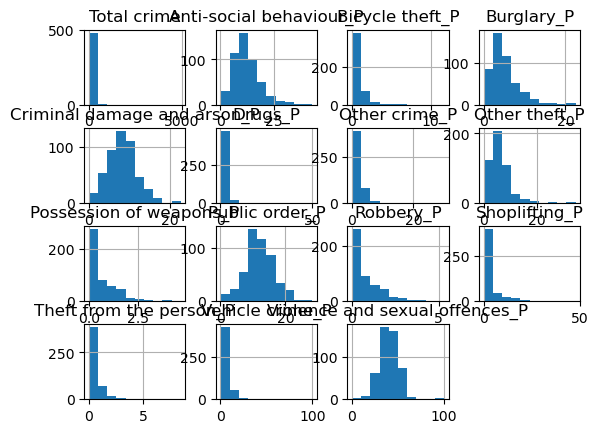

In [146]:
#simple explore
LSOACrime_L_type_Percentage.hist()

In [162]:
# rename the 'LSOA code' to 'LSOA_code' to uniform naming, so that leater during merging, the 'LSOA code' will not be repeated in result and needs to be drop
LSOACrime_L_type_num.rename(columns={'LSOA code':'LSOA_code'},inplace=True)
LSOACrime_L_type_Percentage.rename(columns={'LSOA code':'LSOA_code'},inplace=True)

### crime result
do the similar work like last part

In [147]:
# create a new dataframe only have result and lsoa code
CrimeLeeds2021_ResultOnly = CrimeLeeds2021.loc[:,['LSOA code','Last outcome category']]
# create the new dataframe for storing the counting result of each type of crime in each lsoa
LSOACrime_L_result_num = CrimeLeeds2021_ResultOnly.pivot_table(index='LSOA code', columns='Last outcome category',aggfunc='size' , fill_value=0)
# add a sum of all crime results
# ATTENTION! the result data's sum cannot be seen as sum of all crime, simce it has Nan cells
LSOACrime_L_result_num['Total'] = LSOACrime_L_result_num.sum(axis=1)

In [149]:
#simple explore
LSOACrime_L_result_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, E01011264 to E01035054
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   Action to be taken by another organisation           490 non-null    int64
 1   Awaiting court outcome                               490 non-null    int64
 2   Court result unavailable                             490 non-null    int64
 3   Formal action is not in the public interest          490 non-null    int64
 4   Further action is not in the public interest         490 non-null    int64
 5   Further investigation is not in the public interest  490 non-null    int64
 6   Investigation complete; no suspect identified        490 non-null    int64
 7   Local resolution                                     490 non-null    int64
 8   Offender given a caution                             490 non-null    int64
 9   S

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action to be taken by another organisation'),
  Text(1, 0, 'Awaiting court outcome'),
  Text(2, 0, 'Court result unavailable'),
  Text(3, 0, 'Formal action is not in the public interest'),
  Text(4, 0, 'Further action is not in the public interest'),
  Text(5, 0, 'Further investigation is not in the public interest'),
  Text(6, 0, 'Investigation complete; no suspect identified'),
  Text(7, 0, 'Local resolution'),
  Text(8, 0, 'Offender given a caution'),
  Text(9, 0, 'Status update unavailable'),
  Text(10, 0, 'Suspect charged as part of another case'),
  Text(11, 0, 'Unable to prosecute suspect')])

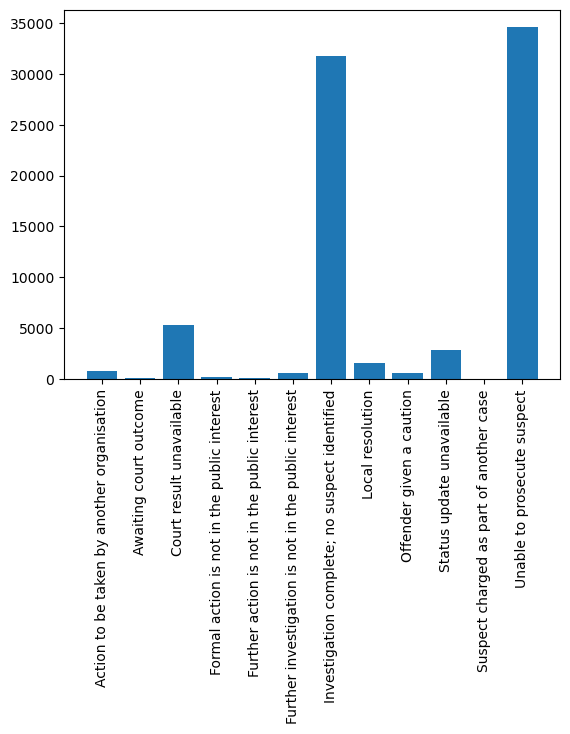

In [152]:
crimeResult_temp = LSOACrime_L_result_num.drop(columns='Total').sum()
mplpplt.bar(crimeResult_temp.index, crimeResult_temp.values)
mplpplt.xticks(rotation=90)

Most cases are unable to prosecute suspects, or there are no confirmed/identified suspects

As it is already calculated in crime type part, some area with only 1 or 2 crime case may have very extreme percentage values, so not calculate the ratio of different kinds of crime result/Last outcome category here.

## merge the crime data and migrate data

In [166]:
# create a new dataframe as the main dataframe for later steps like merging crime&migrant, Statistical modelling
# lsoa name is useless, don't contain
Union_L = Migrant_Indicator_dataonly.loc[:,['mnemonic']]
Union_L = Union_L.rename(columns={'mnemonic':'LSOA_code'})

In [167]:
# merge the crime number data & migrate number data
Union_L_number = pandas.merge(Union_L,Migrant_number.drop(columns='LSOA_name'),left_on='LSOA_code',right_on='LSOA_code',how = 'left')
Union_L_number = pandas.merge(Union_L_number, LSOACrime_L_type_num,left_on='LSOA_code',right_on='LSOA_code',how = 'left')

In [168]:
Union_L_number

,LSOA_code,residents_population,Address1Yago_same,Address1Yago_schoolInUK,Address1Yago_migrantInUK,Address1Yago_migrantOutUK,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,...,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Total crime
0,E01011698,1448.0,1367.0,5.0,75.0,1.0,19.0,0.0,1.0,6.0,...,0.0,7.0,0.0,2.0,1.0,4.0,0.0,3.0,14.0,57.0
1,E01011699,1278.0,1184.0,3.0,87.0,4.0,3.0,0.0,2.0,1.0,...,1.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,15.0,29.0
2,E01011701,1356.0,1224.0,2.0,126.0,4.0,5.0,0.0,1.0,2.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,14.0,25.0
3,E01011702,1631.0,1390.0,9.0,203.0,29.0,2.0,0.0,3.0,1.0,...,0.0,4.0,0.0,6.0,0.0,0.0,0.0,0.0,13.0,30.0
4,E01011703,1219.0,1137.0,6.0,74.0,2.0,0.0,0.0,1.0,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,E01033016,1041.0,614.0,24.0,340.0,63.0,96.0,27.0,38.0,69.0,...,7.0,113.0,5.0,108.0,29.0,135.0,67.0,93.0,396.0,1202.0
484,E01011467,1966.0,1608.0,16.0,308.0,34.0,50.0,5.0,31.0,58.0,...,9.0,75.0,8.0,86.0,11.0,40.0,4.0,76.0,152.0,618.0
485,E01011468,1996.0,1775.0,3.0,197.0,21.0,28.0,6.0,24.0,36.0,...,9.0,25.0,1.0,45.0,3.0,33.0,1.0,28.0,125.0,372.0
486,E01011470,1262.0,1162.0,5.0,91.0,4.0,21.0,4.0,7.0,19.0,...,3.0,19.0,3.0,18.0,1.0,3.0,1.0,21.0,52.0,177.0


In [165]:
LSOA_leeds_2021

,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
10719,E01011264,Leeds 011A,420937,441836,-1.68306,53.8723,8ec81958-1120-437e-944f-a2286a67cda6,"POLYGON ((421248.688 442315.812, 421284.072 44..."
10720,E01011265,Leeds 009A,418988,441951,-1.71269,53.8734,e7e168ad-5f19-447e-9174-ced7b8a66e51,"POLYGON ((418635.000 442559.000, 418637.555 44..."
10721,E01011266,Leeds 008A,417489,442615,-1.73545,53.8795,85fea36f-ed16-465f-8d18-1184fa5f5138,"POLYGON ((417783.688 443382.312, 417788.688 44..."
10722,E01011267,Leeds 009B,419641,442025,-1.70276,53.8741,be007189-7caf-49a4-a9cb-1d307e7786c6,"POLYGON ((419607.843 442388.568, 419612.752 44..."
10723,E01011268,Leeds 010A,420224,441935,-1.69390,53.8732,bda316ed-fbed-4cff-a83e-53d9f48286e5,"POLYGON ((420442.406 442436.687, 420443.313 44..."
...,...,...,...,...,...,...,...,...
33044,E01035050,Leeds 105G,430214,426790,-1.54344,53.7366,95dabcf6-917e-4a34-bb40-4305366b41bc,"POLYGON ((430986.896 427756.226, 430982.739 42..."
33045,E01035051,Leeds 105H,431335,427174,-1.52641,53.7400,bda7a4c4-ce3c-450a-81a4-8acb59dc413f,"POLYGON ((431044.305 427760.241, 431050.502 42..."
33046,E01035052,Leeds 105I,431014,426532,-1.53134,53.7343,5b401df8-4923-45cc-a6fb-ddd21b8712cc,"POLYGON ((431312.508 427066.000, 431277.221 42..."
33047,E01035053,Leeds 105J,432010,426253,-1.51627,53.7317,abb74970-9e4b-46de-b14e-038f5dc35450,"POLYGON ((432234.698 427047.143, 432235.065 42..."


In [ ]:
#


# Result - final visualisations 
repeat the code of two result visualisations for clear cognition

## non-spatial 

## spatial 